<a href="https://colab.research.google.com/github/harsh-reactdev/ml-training/blob/main/rf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

import seaborn as sns
import matplotlib.pyplot as plt


In [14]:
# Update path if needed
df = pd.read_excel("/content/Pumpkin_Seeds_Dataset.xlsx")

display(df)


,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
0,56276,888.242,326.1485,220.2388,56831,267.6805,0.7376,0.9902,0.7453,0.8963,1.4809,0.8207,Çerçevelik
1,76631,1068.146,417.1932,234.2289,77280,312.3614,0.8275,0.9916,0.7151,0.8440,1.7811,0.7487,Çerçevelik
2,71623,1082.987,435.8328,211.0457,72663,301.9822,0.8749,0.9857,0.7400,0.7674,2.0651,0.6929,Çerçevelik
3,66458,992.051,381.5638,222.5322,67118,290.8899,0.8123,0.9902,0.7396,0.8486,1.7146,0.7624,Çerçevelik
4,66107,998.146,383.8883,220.4545,67117,290.1207,0.8187,0.9850,0.6752,0.8338,1.7413,0.7557,Çerçevelik
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,79637,1224.710,533.1513,190.4367,80381,318.4289,0.9340,0.9907,0.4888,0.6672,2.7996,0.5973,Ürgüp Sivrisi
2496,69647,1084.318,462.9416,191.8210,70216,297.7874,0.9101,0.9919,0.6002,0.7444,2.4134,0.6433,Ürgüp Sivrisi
2497,87994,1210.314,507.2200,222.1872,88702,334.7199,0.8990,0.9920,0.7643,0.7549,2.2828,0.6599,Ürgüp Sivrisi
2498,80011,1182.947,501.9065,204.7531,80902,319.1758,0.9130,0.9890,0.7374,0.7185,2.4513,0.6359,Ürgüp Sivrisi


In [15]:
# Convert class labels to numeric
df["Class"] = df["Class"].map({
    "Ürgüp Sivrisi": 0,
    "Çerçevelik": 1
})


In [16]:
X = df.drop("Class", axis=1)
y = df["Class"]

print(y)

0       1
1       1
2       1
3       1
4       1
       ..
2495    0
2496    0
2497    0
2498    0
2499    0
Name: Class, Length: 2500, dtype: int64


In [17]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [18]:
rf = RandomForestClassifier(
    n_estimators=200,
    max_features="sqrt",
    random_state=42
)

rf.fit(X_train, y_train)


RandomForestClassifier(n_estimators=200, random_state=42)

In [19]:
y_pred = rf.predict(X_test)


In [20]:
accuracy = accuracy_score(y_test, y_pred)
accuracy


0.902

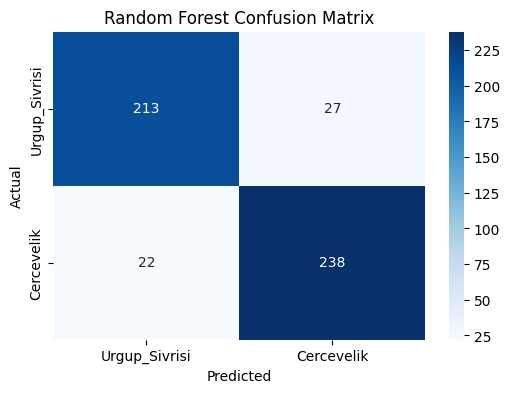

In [22]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["Urgup_Sivrisi", "Cercevelik"],
    yticklabels=["Urgup_Sivrisi", "Cercevelik"]
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest Confusion Matrix")
plt.show()


In [23]:
feature_importance = pd.Series(
    rf.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

feature_importance


,0
Aspect_Ration,0.212077
Eccentricity,0.168348
Compactness,0.159910
Roundness,0.117018
Major_Axis_Length,0.073561
Solidity,0.054540
Minor_Axis_Length,0.052063
Extent,0.043097
Perimeter,0.035095
Equiv_Diameter,0.028904


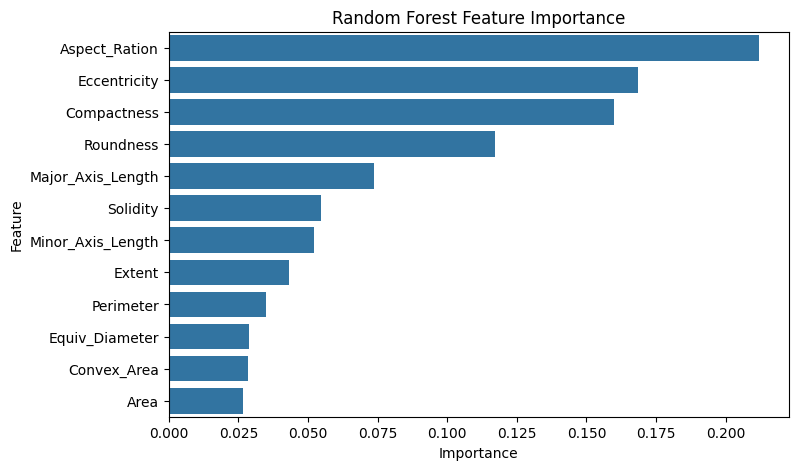

In [24]:
plt.figure(figsize=(8, 5))
sns.barplot(
    x=feature_importance.values,
    y=feature_importance.index
)
plt.title("Random Forest Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()
